In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 7. Clustering

In [40]:
housing = pd.read_csv("final_dataframe_cluster.csv")
housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Median Price                    3780 non-null   int64  
 1   % of Bachelor's Degree          3780 non-null   float64
 2   Per_capita_income               3780 non-null   int64  
 3   total_law_enforcement           3780 non-null   int64  
 4   Precipitation                   3780 non-null   float64
 5   Population                      3780 non-null   int64  
 6   Num Airports                    3780 non-null   int64  
 7   Grad Rates                      3780 non-null   float64
 8   College Enrollment Rate         3780 non-null   float64
 9   Avg Household Size              3780 non-null   float64
 10  Avg #ppl <18                    3780 non-null   float64
 11  Avg #ppl 18+                    3780 non-null   float64
 12  Local Tax Rate                  37

,Median Price,% of Bachelor's Degree,Per_capita_income,total_law_enforcement,Precipitation,Population,Num Airports,Grad Rates,College Enrollment Rate,Avg Household Size,...,Avg #ppl 18+,Local Tax Rate,Violent Crime per 1000 people,Property Crime per 1000 people,National Risk Index,Urban,Suburban,Rural,HasWalMart,HasCostco
0,383330,0.447,47576,1635,21.39,1509240,5,0.783589,65.508589,2.7,...,2.08,0.11,2.52679,2.89295,40.4,1,0,0,1,1
1,410230,0.447,47576,1635,21.39,1509240,5,0.783589,65.508589,2.7,...,2.08,0.11,2.52679,2.89295,40.4,1,0,0,1,1
2,432720,0.447,47576,1635,21.39,1509240,5,0.783589,65.508589,2.7,...,2.08,0.11,2.52679,2.89295,40.4,1,0,0,1,1
3,407830,0.447,47576,1635,21.39,1509240,5,0.783589,65.508589,2.7,...,2.08,0.11,2.52679,2.89295,40.4,1,0,0,1,1
4,472370,0.447,47576,1635,21.39,1509240,5,0.783589,65.508589,2.7,...,2.08,0.11,2.52679,2.89295,40.4,1,0,0,1,1


In [41]:
housing.describe()

,Median Price,% of Bachelor's Degree,Per_capita_income,total_law_enforcement,Precipitation,Population,Num Airports,Grad Rates,College Enrollment Rate,Avg Household Size,...,Avg #ppl 18+,Local Tax Rate,Violent Crime per 1000 people,Property Crime per 1000 people,National Risk Index,Urban,Suburban,Rural,HasWalMart,HasCostco
count,3.780000e+03,3780.000000,3780.000000,3780.000000,3780.000000,3.780000e+03,3780.000000,3780.000000,3780.000000,3780.000000,...,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,4.051217e+05,0.189215,49180.311111,1347.901587,25.870635,9.967244e+05,10.000000,0.757239,55.206399,2.809714,...,2.092571,0.080857,3.099041,2.486788,32.599143,0.342857,0.428571,0.228571,0.857143,0.771429
std,2.588765e+05,0.070527,17745.996495,2826.316228,16.950617,1.767892e+06,8.011767,0.044473,7.202111,0.303454,...,0.139125,0.008409,1.005803,0.903787,15.573430,0.474727,0.494937,0.419968,0.349973,0.419968
min,8.562000e+04,0.045000,28060.000000,68.000000,2.190000,6.458000e+04,2.000000,0.622149,33.558355,2.310000,...,1.840000,0.070000,1.612210,1.137010,12.230000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.254875e+05,0.131000,37238.000000,221.000000,13.200000,1.784300e+05,5.000000,0.723647,51.193206,2.550000,...,1.970000,0.080000,2.374000,1.806240,22.950000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.244050e+05,0.191000,44713.000000,418.000000,20.760000,4.178920e+05,8.000000,0.754480,56.866847,2.750000,...,2.100000,0.080000,2.818500,2.285420,31.160000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,5.250000e+05,0.231000,54885.000000,1205.000000,38.810000,9.474160e+05,12.000000,0.795957,60.215655,3.080000,...,2.240000,0.080000,3.700620,2.997550,37.440000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.770000e+06,0.490000,132000.000000,16990.000000,78.570000,1.028373e+07,40.000000,0.848233,66.941582,3.360000,...,2.300000,0.110000,6.649280,5.208550,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
housing_scaled = scaler.fit_transform(housing)

housing_scaled = pd.DataFrame(housing_scaled, columns=housing.columns)
housing_scaled.describe()

,Median Price,% of Bachelor's Degree,Per_capita_income,total_law_enforcement,Precipitation,Population,Num Airports,Grad Rates,College Enrollment Rate,Avg Household Size,...,Avg #ppl 18+,Local Tax Rate,Violent Crime per 1000 people,Property Crime per 1000 people,National Risk Index,Urban,Suburban,Rural,HasWalMart,HasCostco
count,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,...,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03,3.780000e+03
mean,-1.414506e-16,3.368264e-16,-1.526586e-15,-3.493678e-16,4.652363e-17,-4.517257e-17,-2.477266e-15,-1.149345e-15,-2.086074e-15,1.633996e-15,...,1.267901e-15,-1.123198e-15,-4.328108e-16,2.044734e-16,4.440305e-16,-5.894932e-15,7.283474e-15,-2.545759e-15,-2.444605e-15,-1.755797e-15
std,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,...,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00
min,-1.234349e+00,-2.045095e+00,-1.190303e+00,-4.529114e-01,-1.397222e+00,-5.273330e-01,-9.986634e-01,-3.037994e+00,-3.006189e+00,-1.646973e+00,...,-1.815674e+00,-1.291293e+00,-1.478448e+00,-1.493667e+00,-1.308115e+00,-7.223151e-01,-8.660254e-01,-5.443311e-01,-2.449490e+00,-1.837117e+00
25%,-6.939909e-01,-8.255404e-01,-6.730471e-01,-3.987702e-01,-7.476018e-01,-4.629257e-01,-6.241646e-01,-7.554342e-01,-5.572982e-01,-8.559739e-01,...,-8.811357e-01,-1.019441e-01,-7.209532e-01,-7.530956e-01,-6.196721e-01,-7.223151e-01,-8.660254e-01,-5.443311e-01,4.082483e-01,5.443311e-01
50%,-3.118373e-01,2.531172e-02,-2.517696e-01,-3.290589e-01,-3.015413e-01,-3.274572e-01,-2.496658e-01,-6.204862e-02,2.305807e-01,-1.968081e-01,...,5.340217e-02,-1.019441e-01,-2.789593e-01,-2.228339e-01,-9.242237e-02,-7.223151e-01,-8.660254e-01,-5.443311e-01,4.082483e-01,5.443311e-01
75%,4.631328e-01,5.925465e-01,3.215060e-01,-5.056776e-02,7.634576e-01,-2.789478e-02,2.496658e-01,8.707156e-01,6.956180e-01,8.908156e-01,...,1.059828e+00,-1.019441e-01,5.981874e-01,5.652107e-01,3.108819e-01,1.384437e+00,1.154701e+00,-5.443311e-01,4.082483e-01,5.443311e-01
max,5.273012e+00,4.265391e+00,4.667568e+00,5.535180e+00,3.109405e+00,5.253846e+00,3.744988e+00,2.046337e+00,1.629624e+00,1.813648e+00,...,1.491153e+00,3.466101e+00,3.530223e+00,3.011908e+00,4.328512e+00,1.384437e+00,1.154701e+00,1.837117e+00,4.082483e-01,5.443311e-01


In [43]:
wcss = []
for k in range(1, 100):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans.fit(housing_scaled)
    wcss.append(kmeans.inertia_)

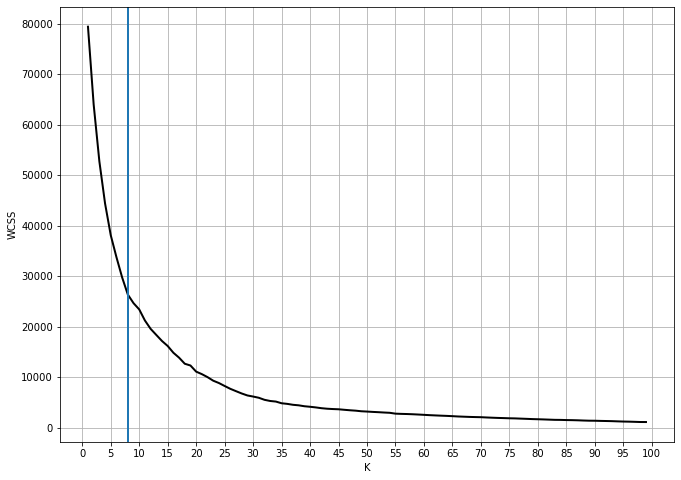

In [44]:
plt.figure(figsize=(11,8))
plt.plot(range(1, 100), wcss, linewidth=2, color='black')
plt.axvline(x=8, linewidth=2)
plt.xticks(np.linspace(0,100,21))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

In [45]:
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=100, random_state=88)
kmeans.fit(housing_scaled)

KMeans(max_iter=100, random_state=88)

In [46]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

26329.14482570727

In [47]:
# Number of iterations
kmeans.n_iter_

8

In [48]:
# Cluster for each datapoint
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [49]:
# Cluster centroids
kmeans.cluster_centers_

array([[ 0.08166256,  0.35777431,  0.12882982,  5.37338498, -0.82168293,
         5.13089911,  1.37316217, -0.38307787,  0.49257011,  0.56123264,
         0.1329069 ,  1.05982758,  2.27675268, -0.17990533, -0.03098846,
         4.32851171,  1.38443731, -0.8660254 , -0.54433105,  0.40824829,
         0.54433105],
       [ 1.98859529,  1.41689228,  2.10991208, -0.32892334,  0.28453756,
        -0.32161106, -0.83416394,  0.57597743,  0.91627913, -0.72629693,
        -0.85109492, -0.52572915,  0.68724966, -1.00367349, -0.75169749,
        -0.86843318, -0.01350122,  0.47483013, -0.54433105, -2.44948974,
         0.54433105],
       [-0.79173905, -1.15345108, -0.75865517, -0.42951707, -0.02864285,
        -0.50290343, -0.20805487, -0.85611197, -0.08432618,  0.82489898,
         1.0027447 ,  0.55661487, -0.49839362,  1.2059804 ,  0.60701196,
        -0.21080202, -0.72231512, -0.8660254 ,  1.83711731, -0.54433105,
        -1.83711731],
       [ 1.05943643,  1.00103426,  0.78130898,  0.22491556

In [50]:
kmeans_size = []
clusters = np.unique(kmeans.labels_)
for cluster in clusters:
    kmeans_size.append(len(np.where(kmeans.labels_ == cluster)[0]))

kmeans_size  

[108, 321, 324, 432, 540, 648, 432, 975]

In [51]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', 
                                        #Ward's minimum variance criterion minimizes the total within-cluster variance.
                                        distance_threshold=0)
agglomerative.fit(housing_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [52]:
# n_clusters_: int   The number of clusters found by the algorithm.
#  If distance_threshold=None, it will be equal to the given n_clusters.
agglomerative.n_clusters_

3780

In [53]:
agglomerative.labels_

array([3463, 2798, 2876, ...,    5,    2,    0])

In [54]:
agglomerative.distances_

array([  0.        ,   0.        ,   0.        , ..., 128.95334741,
       143.99434118, 170.14883489])

In [55]:
agglomerative.children_

array([[2596, 2598],
       [  79,   81],
       [  88,   95],
       ...,
       [7497, 7554],
       [7551, 7555],
       [7556, 7557]])

In [56]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)    

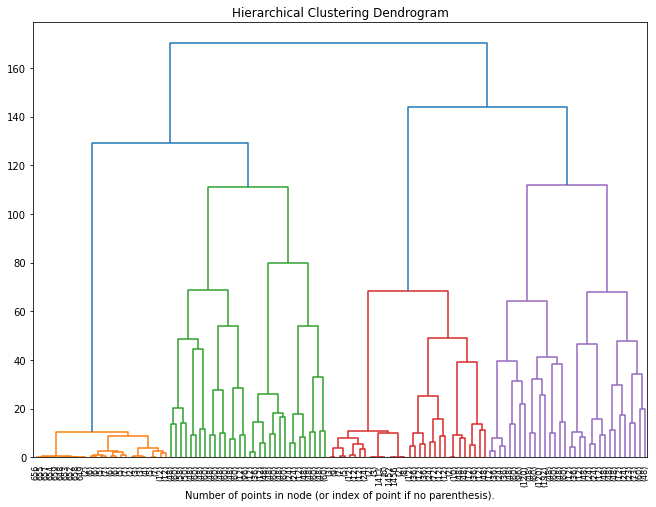

In [57]:
plt.figure(figsize=(11,8))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode='level', p=6, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

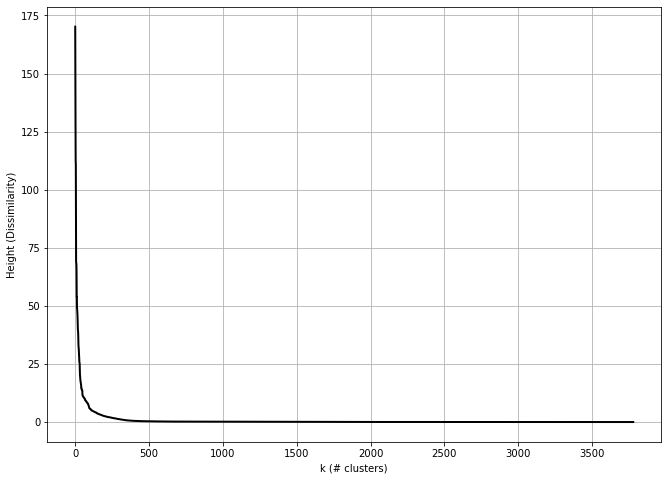

In [58]:
reversed_distances = agglomerative.distances_[::-1]
plt.figure(figsize=(11,8))
plt.plot(reversed_distances, linewidth=2, color='black')
plt.xlabel('k (# clusters)')
plt.ylabel('Height (Dissimilarity)')
plt.grid(axis='both')
plt.show()

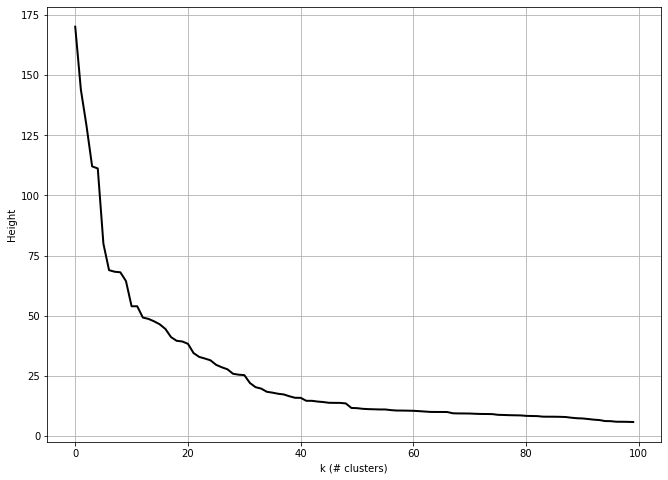

In [59]:
plt.figure(figsize=(11,8))
plt.plot(reversed_distances[:100], linewidth=2, color='black')
plt.xlabel('k (# clusters)')
plt.ylabel('Height')
plt.grid(axis='both')
plt.show()

In [61]:
new_agglomerative = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward',
                                            distance_threshold=None)
new_agglomerative.fit(housing_scaled)

AgglomerativeClustering(n_clusters=8)

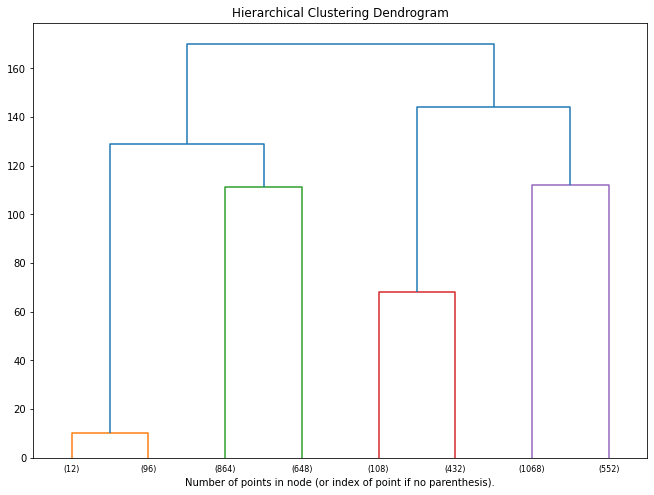

In [62]:
plt.figure(figsize=(11,8))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode='level', p=2, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [63]:
new_housing_scaled = housing_scaled.copy()
new_housing_scaled['Cluster'] = new_agglomerative.labels_
new_housing_scaled.head()

,Median Price,% of Bachelor's Degree,Per_capita_income,total_law_enforcement,Precipitation,Population,Num Airports,Grad Rates,College Enrollment Rate,Avg Household Size,...,Local Tax Rate,Violent Crime per 1000 people,Property Crime per 1000 people,National Risk Index,Urban,Suburban,Rural,HasWalMart,HasCostco,Cluster
0,-0.084189,3.655614,-0.090416,0.101594,-0.26437,0.28994,-0.624165,0.592591,1.430629,-0.3616,...,3.466101,-0.569025,0.44946,0.500974,1.384437,-0.866025,-0.544331,0.408248,0.544331,1
1,0.019735,3.655614,-0.090416,0.101594,-0.26437,0.28994,-0.624165,0.592591,1.430629,-0.3616,...,3.466101,-0.569025,0.44946,0.500974,1.384437,-0.866025,-0.544331,0.408248,0.544331,1
2,0.106622,3.655614,-0.090416,0.101594,-0.26437,0.28994,-0.624165,0.592591,1.430629,-0.3616,...,3.466101,-0.569025,0.44946,0.500974,1.384437,-0.866025,-0.544331,0.408248,0.544331,1
3,0.010463,3.655614,-0.090416,0.101594,-0.26437,0.28994,-0.624165,0.592591,1.430629,-0.3616,...,3.466101,-0.569025,0.44946,0.500974,1.384437,-0.866025,-0.544331,0.408248,0.544331,1
4,0.259804,3.655614,-0.090416,0.101594,-0.26437,0.28994,-0.624165,0.592591,1.430629,-0.3616,...,3.466101,-0.569025,0.44946,0.500974,1.384437,-0.866025,-0.544331,0.408248,0.544331,1


In [64]:
# Cluster Centroids
new_housing_scaled.groupby(['Cluster']).mean()

,Median Price,% of Bachelor's Degree,Per_capita_income,total_law_enforcement,Precipitation,Population,Num Airports,Grad Rates,College Enrollment Rate,Avg Household Size,...,Avg #ppl 18+,Local Tax Rate,Violent Crime per 1000 people,Property Crime per 1000 people,National Risk Index,Urban,Suburban,Rural,HasWalMart,HasCostco
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.455279,-0.065446,-0.222419,-0.404369,1.441530,-0.499376,-0.449399,-0.307585,-1.746852,-1.310798,...,-1.413103,-0.577684,0.463509,-0.139825,-0.679525,-0.722315,-0.866025,1.837117,-0.163299,-1.360828
1,1.675139,1.427985,1.691005,-0.174836,0.037853,-0.036536,-0.735429,0.463292,0.950539,-0.442562,...,-0.185702,1.294247,-0.955741,-0.644779,-0.532695,0.514257,-0.031378,-0.544331,-1.269120,0.544331
2,-0.791739,-1.153451,-0.758655,-0.429517,-0.028643,-0.502903,-0.208055,-0.856112,-0.084326,0.824899,...,0.556615,-0.498394,1.205980,0.607012,-0.210802,-0.722315,-0.866025,1.837117,-0.544331,-1.837117
3,-0.646651,-0.775875,-0.757603,0.301753,-0.875162,0.296296,1.841286,-0.217070,-0.279323,1.179201,...,0.987940,-0.101944,0.472401,0.544726,0.816297,1.384437,-0.866025,-0.544331,0.408248,0.544331
4,-0.018897,0.081079,-0.051084,-0.342919,0.182433,-0.383189,-0.352057,0.259320,0.393178,-0.419739,...,-0.331883,-0.222215,-0.378789,-0.176767,-0.132686,-0.722315,1.154701,-0.544331,0.408248,0.303510
5,0.322114,0.543701,0.137828,0.475766,-0.691566,0.661409,0.405707,-0.108730,0.231458,0.206931,...,0.412840,-0.399281,-0.489931,-0.405119,0.302694,1.384437,-0.866025,-0.544331,0.408248,0.544331
6,-0.835616,-1.247290,-0.799807,-0.296123,-0.676886,-0.326692,-0.083222,0.286737,-0.020094,1.462093,...,0.987940,-0.101944,0.981747,1.131405,-0.246551,-0.722315,1.154701,-0.544331,0.408248,0.544331
7,0.081663,0.357774,0.128830,5.373385,-0.821683,5.130899,1.373162,-0.383078,0.492570,0.561233,...,1.059828,2.276753,-0.179905,-0.030988,4.328512,1.384437,-0.866025,-0.544331,0.408248,0.544331


In [65]:
# Cluster Size
new_housing_scaled.groupby(['Cluster']).count()

,Median Price,% of Bachelor's Degree,Per_capita_income,total_law_enforcement,Precipitation,Population,Num Airports,Grad Rates,College Enrollment Rate,Avg Household Size,...,Avg #ppl 18+,Local Tax Rate,Violent Crime per 1000 people,Property Crime per 1000 people,National Risk Index,Urban,Suburban,Rural,HasWalMart,HasCostco
Cluster,,,,,,,,,,,,,,,,,,,,,
0,540,540,540,540,540,540,540,540,540,540,...,540,540,540,540,540,540,540,540,540,540
1,552,552,552,552,552,552,552,552,552,552,...,552,552,552,552,552,552,552,552,552,552
2,324,324,324,324,324,324,324,324,324,324,...,324,324,324,324,324,324,324,324,324,324
3,432,432,432,432,432,432,432,432,432,432,...,432,432,432,432,432,432,432,432,432,432
4,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
5,432,432,432,432,432,432,432,432,432,432,...,432,432,432,432,432,432,432,432,432,432
6,324,324,324,324,324,324,324,324,324,324,...,324,324,324,324,324,324,324,324,324,324
7,108,108,108,108,108,108,108,108,108,108,...,108,108,108,108,108,108,108,108,108,108
